## CReM vs. REINVENT: A first look

In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from crem.crem import grow_mol, mutate_mol

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
import useful_rdkit_utils as uru
import mols2grid

sns.set(rc = {'figure.figsize':(15,8)})

import warnings
warnings.filterwarnings('ignore')

In [27]:
db = '../crem_db/crem_db2.5.db'

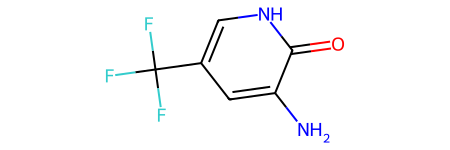

In [28]:
frag_smi = "Nc1cc(c[nH]c1=O)C(F)(F)F"
frag_mol = Chem.MolFromSmiles(frag_smi)
frag_mol

### Question: Is there a difference between "growing" the molecule, then "mutating" the results of the grown molecules vs. doing this in the opposite order, i.e., mutating the initial molecule then growing each of those mutations?

## CReM `grow` => `mutate`

In [29]:
out_list = []
grow_list = list(grow_mol(frag_mol, db_name=db,return_mol=False))

for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])
    
df = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])

[16:47:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:15] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:15] WARNING: not removing hydrogen atom with dummy atom neighbors


In [30]:
df

,Idx,SMILES,Input_SMILES
0,0,CNc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,O=NNc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F


In [31]:
smiles = df['SMILES'].values
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [32]:
mols2grid.display(mols,
                  size=(400, 250))

MolGridWidget()

Now I'll mutate each of the grown molecules

In [33]:
df_grow_to_mutate = pd.DataFrame()

In [34]:
for mol in mols:
    
    out_list = []
    grow_list = list(mutate_mol(mol, db_name=db, return_mol=False))

    for idx,analog in enumerate(grow_list):
        out_list.append([idx,analog,frag_smi])

    temp_df = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])

df_grow_to_mutate = pd.concat((df_grow_to_mutate, temp_df))

In [35]:
df_grow_to_mutate

,Idx,SMILES,Input_SMILES
0,0,O=c1[nH]cc(C(F)(F)F)cc1Br,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,Cc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
2,2,CC(=O)c1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
3,3,CCOC(=O)c1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
4,4,O=c1[nH]cc(C(F)(F)F)cc1Cl,Nc1cc(c[nH]c1=O)C(F)(F)F
...,...,...,...
504,504,COC(=O)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
505,505,Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
506,506,O=C(CBr)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
507,507,O=C(CCl)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F


In [36]:
smiles = df_grow_to_mutate['SMILES'].values[:10]
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [37]:
mols2grid.display(mols, size=(200, 150))

MolGridWidget()

## CReM `mutate` => `grow`

In [38]:
out_list = []
grow_list = list(mutate_mol(frag_mol, db_name=db,return_mol=False))

for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])

df_mutate = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])

In [49]:
len(df_mutate)

485

In [39]:
df_mutate.head()

,Idx,SMILES,Input_SMILES
0,0,Nc1cc(-c2ccccc2)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,Nc1cc([N+](=O)[O-])c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
2,2,FC(F)(F)c1nc2ccc(Br)cc2[nH]1,Nc1cc(c[nH]c1=O)C(F)(F)F
3,3,FC(F)(F)c1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
4,4,FC(F)(F)c1[nH]nc2ccccc12,Nc1cc(c[nH]c1=O)C(F)(F)F


In [40]:
PandasTools.AddMoleculeColumnToFrame(df_mutate, 'SMILES', 'Molecule')

Failed to patch pandas - unable to change molecule rendering


In [41]:
df_mutate_to_grow = pd.DataFrame()

In [42]:
mols = df_mutate['Molecule'].values

for mol in mols:
    
    out_list = []
    grow_list = list(grow_mol(mol, db_name=db, return_mol=False))

    for idx,analog in enumerate(grow_list):
        out_list.append([idx, analog, frag_smi])

    temp_df = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])

df_mutate_to_grow = pd.concat((df_grow_to_mutate, temp_df))

[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:47:35] WARNING: not removing hydrogen atom with

In [43]:
df_mutate_to_grow

,Idx,SMILES,Input_SMILES
0,0,O=c1[nH]cc(C(F)(F)F)cc1Br,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,Cc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
2,2,CC(=O)c1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
3,3,CCOC(=O)c1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
4,4,O=c1[nH]cc(C(F)(F)F)cc1Cl,Nc1cc(c[nH]c1=O)C(F)(F)F
...,...,...,...
504,504,COC(=O)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
505,505,Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
506,506,O=C(CBr)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
507,507,O=C(CCl)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F


In [44]:
df_grow_to_mutate

,Idx,SMILES,Input_SMILES
0,0,O=c1[nH]cc(C(F)(F)F)cc1Br,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,Cc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
2,2,CC(=O)c1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
3,3,CCOC(=O)c1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
4,4,O=c1[nH]cc(C(F)(F)F)cc1Cl,Nc1cc(c[nH]c1=O)C(F)(F)F
...,...,...,...
504,504,COC(=O)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
505,505,Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
506,506,O=C(CBr)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
507,507,O=C(CCl)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F


In [45]:
x = set(df_mutate_to_grow['SMILES'].unique())

len(x)

509

In [46]:
y = set(df_grow_to_mutate['SMILES'].unique())

len(y)

509

In [47]:
z = x.intersection(y)

In [48]:
len(z)

509

Thus, everything in `df_grow_to_mutate` is also in `df_mutate_to_grow`.

### Question: How many of these resulting molecules make it through the odd ring filter?

In [56]:
def remove_odd_rings(df):
    
    ring_system_lookup = uru.RingSystemLookup.default()
    df['ring_systems'] = df.SMILES.apply(ring_system_lookup.process_smiles)
    df[['min_ring','min_freq']] = df.ring_systems.apply(uru.get_min_ring_frequency).to_list()
    df = df.query('min_freq > 100').copy()
    
    return df.iloc[:, 0:3]

In [135]:
df = df_grow_to_mutate

In [136]:
df = remove_odd_rings(df)

In [137]:
df

,Idx,SMILES,Input_SMILES
0,0,O=c1[nH]cc(C(F)(F)F)cc1Br,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,Cc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
2,2,CC(=O)c1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
3,3,CCOC(=O)c1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
4,4,O=c1[nH]cc(C(F)(F)F)cc1Cl,Nc1cc(c[nH]c1=O)C(F)(F)F
...,...,...,...
504,504,COC(=O)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
505,505,Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
506,506,O=C(CBr)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
507,507,O=C(CCl)Nc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F


Evidently, 434 out of 509 generated molecules passed the filter. Now, I'll compare these to REINVENT

In [138]:
df_reinvent = pd.read_csv('data/dataframe.csv')

In [139]:
df_reinvent

,Unnamed: 0,SMILES,Input_SMILES,Tanimoto,Prior
0,0,Nc1cc(C(F)(F)F)c[nH]c1=S,Nc1cc(C(F)(F)F)c[nH]c1=O,0.675676,high_similarity
1,1,O=c1[nH]cc(C(F)(F)F)cc1Br,Nc1cc(C(F)(F)F)c[nH]c1=O,0.675676,high_similarity
2,2,Cc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.675676,high_similarity
3,3,O=c1[nH]cc(C(F)(F)F)cc1I,Nc1cc(C(F)(F)F)c[nH]c1=O,0.675676,high_similarity
4,4,Nc1cc(C(F)(F)C(F)(F)F)c[nH]c1=O,Nc1cc(C(F)(F)F)c[nH]c1=O,0.682927,high_similarity
...,...,...,...,...,...
2434,415,CCC(CC)Cc1c[nH]c(=O)c(N)c1,Nc1cc(C(F)(F)F)c[nH]c1=O,0.372549,similarity
2435,416,Nc1c[nH]c(=O)cc1C(F)(F)F,Nc1cc(C(F)(F)F)c[nH]c1=O,0.454545,similarity
2436,417,Nc1cc(C(F)F)[nH]c(=O)c1Br,Nc1cc(C(F)(F)F)c[nH]c1=O,0.675000,similarity
2437,418,Nc1cc(-c2cc(C(F)(F)F)c[nH]c2=O)ccc1[N+](=O)[O-],Nc1cc(C(F)(F)F)c[nH]c1=O,0.392157,similarity


In [140]:
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Molecule')
PandasTools.AddMoleculeColumnToFrame(df_reinvent, 'SMILES', 'Molecule')

Failed to patch pandas - unable to change molecule rendering
Failed to patch pandas - unable to change molecule rendering


In [141]:
y = set(df_reinvent['SMILES'].unique())

In [142]:
z = x.intersection(y)
intersect_mols = [Chem.MolFromSmiles(smile) for smile in z]

In [143]:
mols2grid.display(intersect_mols)

MolGridWidget()

It seems like there are fifteen intersections between the two models, which is not many considering the CReM dataset contains 434 and the REINVENT dataset contains more than 2000.

## Visualizations

In [144]:
mols = df['Molecule']
mols_reinvent = df_reinvent['Molecule']

In [145]:
fpgen = fpgen = AllChem.GetMorganGenerator()

fingerprints_crem = [fpgen.GetFingerprint(mol).ToList() for mol in mols]
fingerprints_reinvent = [fpgen.GetFingerprint(mol).ToList() for mol in mols_reinvent]

initial_fragment_fp = [fpgen.GetFingerprint(frag_mol)]

In [146]:
df['Fingerprints'] = fingerprints_crem
df_reinvent['Fingerprints'] = fingerprints_reinvent

## PCA

In [147]:
X = np.vstack((fingerprints_crem, fingerprints_reinvent, initial_fragment_fp))

In [148]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [149]:
pca = PCA(n_components=3, random_state=0)
pca_fps = pca.fit_transform(X)

In [150]:
pca.explained_variance_ratio_

array([0.00707223, 0.00668297, 0.00589053])

Hardly any variance is explained by the first 3 principal components... we will probably end up using t-SNE

In [151]:
df['PC1'], df_reinvent['PC1'], frag_pc1 = pca_fps.T[0][:434], pca_fps.T[0][434:-1], pca_fps[0][-1]
df['PC2'], df_reinvent['PC2'], frag_pc2 = pca_fps.T[1][:434], pca_fps.T[1][434:-1], pca_fps[1][-1]
df['PC3'], df_reinvent['PC3'], frag_pc3 = pca_fps.T[2][:434], pca_fps.T[2][434:-1], pca_fps[2][-1]

Text(0.5, 1.0, 'PCA: CReM vs. REINVENT')

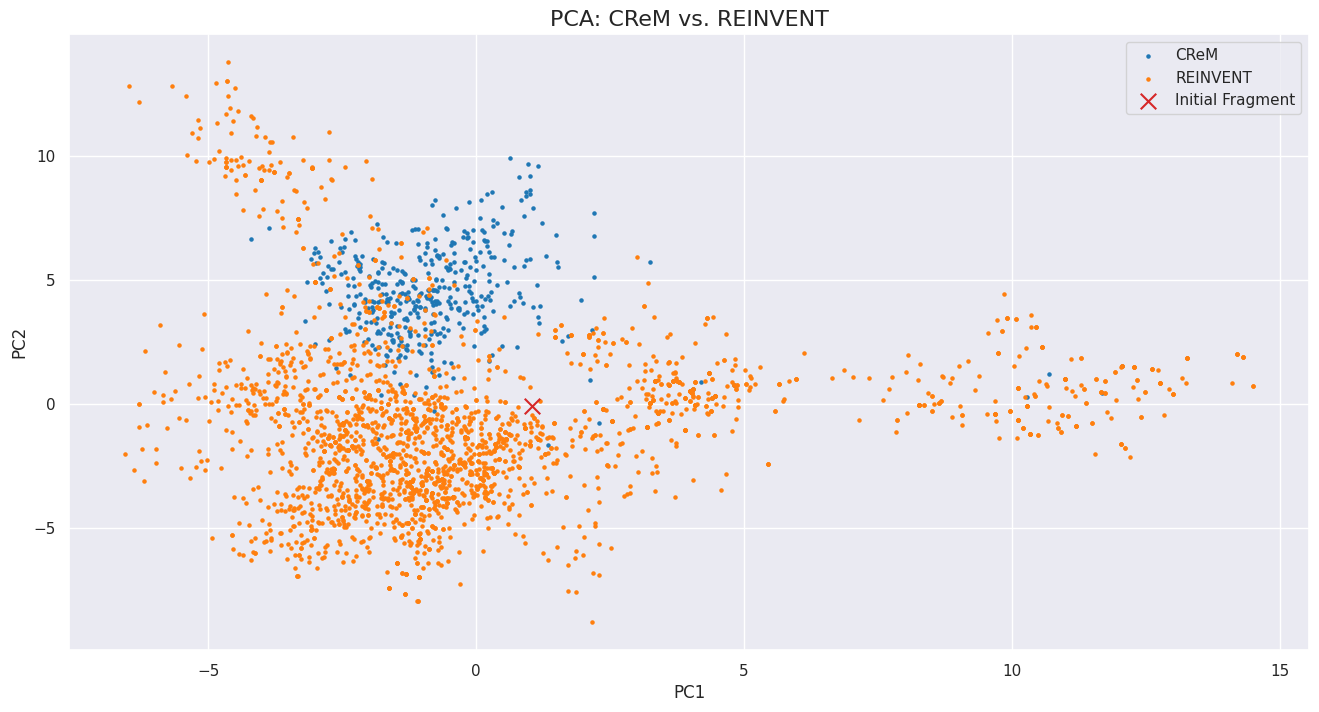

In [152]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

ax.scatter(df['PC1'], df['PC2'], s=5, c='tab:blue', label='CReM')
ax.scatter(df_reinvent['PC1'], df_reinvent['PC2'], s=5, c='tab:orange', label='REINVENT')
ax.scatter(frag_pc1, frag_pc2, s=125, c='tab:red', marker='x', label='Initial Fragment')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.legend()

ax.set_title('PCA: CReM vs. REINVENT', fontsize=16)

In [153]:
df['Model'], df_reinvent['Model'] = 'CReM', 'REINVENT'

In [154]:
df_vis = pd.concat((df, df_reinvent[:500]))

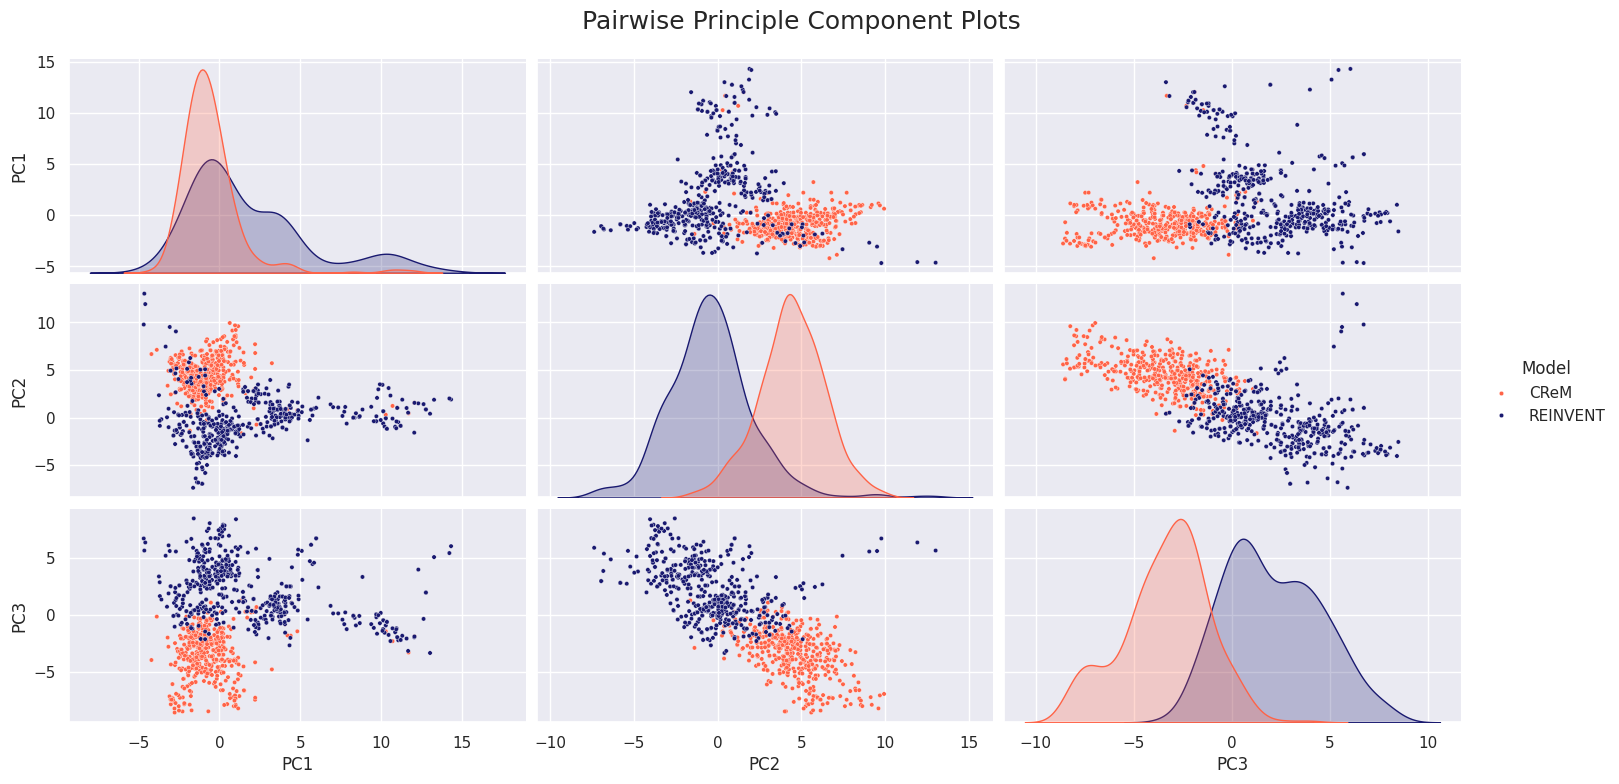

In [158]:
f = sns.pairplot(df_vis,
                 hue='Model',
                 vars=['PC1', 'PC2', 'PC3'],
                 palette=['tomato', 'midnightblue'],
                 aspect=2,
                 plot_kws=dict(s=10))

f.fig.suptitle('Pairwise Principle Component Plots', fontsize=18, y=1.04);

## t-SNE

In [211]:
X = np.vstack((fingerprints_crem, fingerprints_reinvent, initial_fragment_fp))

In [212]:
p = 100

pca_model = PCA(n_components=30, random_state=0)
tsne_model = TSNE(n_components=2, random_state=0, perplexity=p, n_iter=5000)
tsne_fps = tsne_model.fit_transform(pca_model.fit_transform(X))

In [213]:
df['TSNE1'], df_reinvent['TSNE1'], frag_tsne1 = tsne_fps.T[0][:434], tsne_fps.T[0][434:-1], tsne_fps[0][-1]
df['TSNE2'], df_reinvent['TSNE2'], frag_tsne2 = tsne_fps.T[1][:434], tsne_fps.T[1][434:-1], tsne_fps[1][-1]

In [214]:
df_vis = pd.DataFrame

In [215]:
df_vis = pd.concat((df, df_reinvent))

Text(0.5, 1.06, 't-SNE components ($p=50$)')

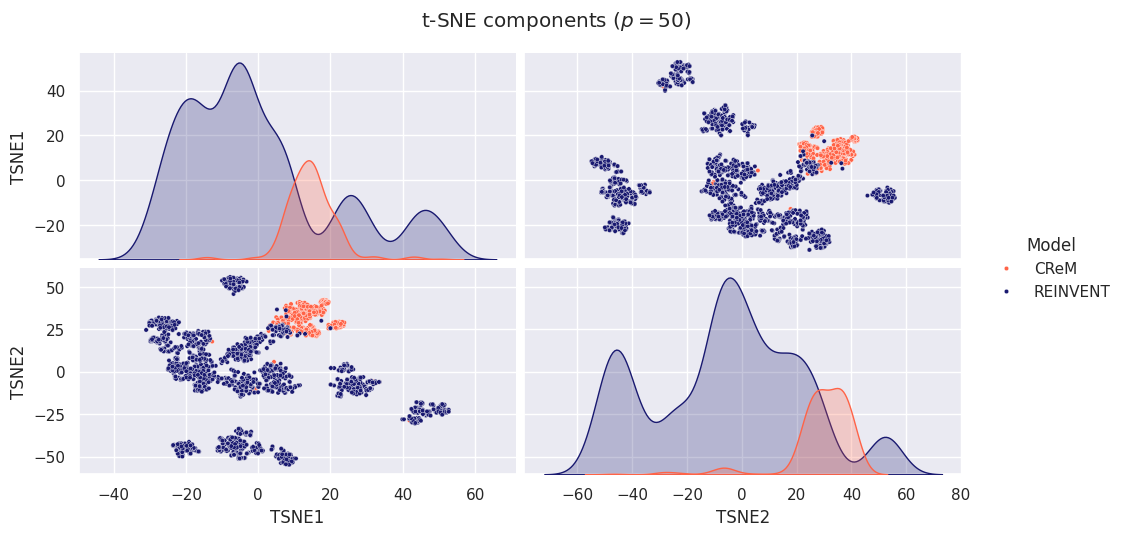

In [216]:
f = sns.pairplot(df_vis,
                 hue='Model',
                 vars=['TSNE1', 'TSNE2'],
                 palette=['tomato', 'midnightblue'],
                 aspect=2,
                 plot_kws=dict(s=10))

f.fig.suptitle('t-SNE components ($p=50$)', y=1.06)